In [29]:
#Question1:

import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
train_df.describe() # gives an idea of how the attributes look like

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


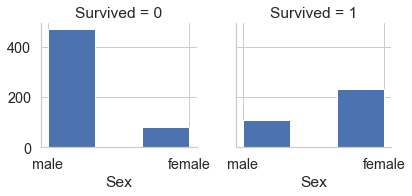

In [48]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Sex', bins=3)
# classification histogram

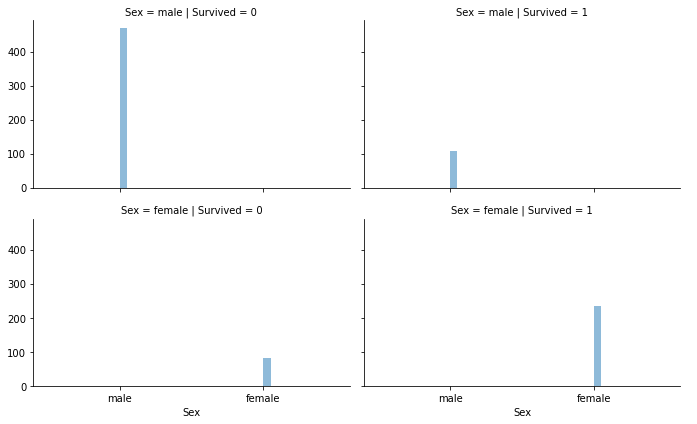

In [9]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex',  aspect=1.6)
grid.map(plt.hist, 'Sex', alpha=.5, bins=20)
grid.add_legend();

In [10]:
# the graph shows, the female passengers had a good chance of survival. 
# We can add this data to our model.

In [49]:
train_df = train_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
test_df.head()
#dropping Ticket and Cabin as they are irrelevant

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S


In [12]:
combine = [train_df, test_df]

In [13]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [14]:
print(dataset['Title'])

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object


In [15]:
for dataset in combine:
     dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Jonkheer', 'Dona'], 'Lady')
     dataset['Title'] = dataset['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir')
     dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [16]:
title_mapping = {"Col": 1, "Dr": 2, "Lady": 3, "Master": 4, "Miss": 5, "Mr": 6, "Mrs": 7, "Rev": 8, "Sir": 9}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [17]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [18]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [19]:
print(train_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Title         0
dtype: int64


In [20]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [21]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [22]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [23]:
meanAge = int(train_df.Age.dropna().mean())
print('Mean Age = ', meanAge)

Mean Age =  29


In [24]:
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(meanAge)
    dataset['Fare'] = dataset['Fare'].fillna(test_df['Fare'].dropna().median())

In [25]:
combine[0].to_csv('train_preprocessed.csv',index=False)
combine[1].to_csv('test_preprocessed.csv',index=False)

In [26]:
trainnew =pd.read_csv('train_preprocessed.csv')
testnew =pd.read_csv('test_preprocessed.csv')
testnew

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title
0,892,3,0,34.5,7.8292,2,6
1,893,3,1,47.0,7.0000,0,7
2,894,2,0,62.0,9.6875,2,6
3,895,3,0,27.0,8.6625,0,6
4,896,3,1,22.0,12.2875,0,7
...,...,...,...,...,...,...,...
413,1305,3,0,29.0,8.0500,0,6
414,1306,1,1,39.0,108.9000,1,3
415,1307,3,0,38.5,7.2500,0,6
416,1308,3,0,29.0,8.0500,0,6


In [27]:
X_train = trainnew.drop("Survived", axis=1)
Y_train = trainnew["Survived"]
X_test  = testnew.drop("PassengerId", axis=1).copy()

In [28]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.0

In [34]:
#Question 2:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings # current version generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
glass = pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [37]:
X = glass.iloc[:, :-1].values
y = glass.iloc[:, -1].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.28      0.89      0.42         9
           2       0.40      0.11      0.17        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.67      1.00      0.80         6

    accuracy                           0.37        43
   macro avg       0.22      0.33      0.23        43
weighted avg       0.33      0.37      0.27        43

[[ 8  1  0  0  0  0]
 [16  2  0  0  0  1]
 [ 5  0  0  0  0  0]
 [ 0  0  0  0  0  2]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


In [40]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43

[[ 9  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 6  0  0  0  0  0]]
accuracy is 0.20930232558139536


In [41]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43

[[ 4  3  1  0  1  0]
 [14  3  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


In [42]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.27      0.89      0.41         9
           2       0.29      0.11      0.15        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.35        43
   macro avg       0.23      0.30      0.23        43
weighted avg       0.30      0.35      0.27        43

[[ 8  1  0  0  0  0]
 [16  2  0  0  0  1]
 [ 5  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 1  0  0  0  0  5]]
accuracy is 0.3488372093023256


In [43]:
# Complement Naive Bayes

from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))
#print(round(accuracy_score(y_pred,y_test)*100))

              precision    recall  f1-score   support

           1       0.28      1.00      0.44         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       0.50      0.50      0.50         2
           7       0.75      1.00      0.86         6

    accuracy                           0.40        43
   macro avg       0.42      0.50      0.41        43
weighted avg       0.23      0.40      0.27        43

[[ 9  0  0  0  0  0]
 [17  0  0  0  1  1]
 [ 5  0  0  0  0  0]
 [ 0  0  0  1  0  1]
 [ 1  0  0  0  1  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.3953488372093023


In [44]:
# Among all the Naive Bayes Algorithm, Complement Naive Bayes has the maximum accuracy.
# SVM has a lower accuracy of the two.

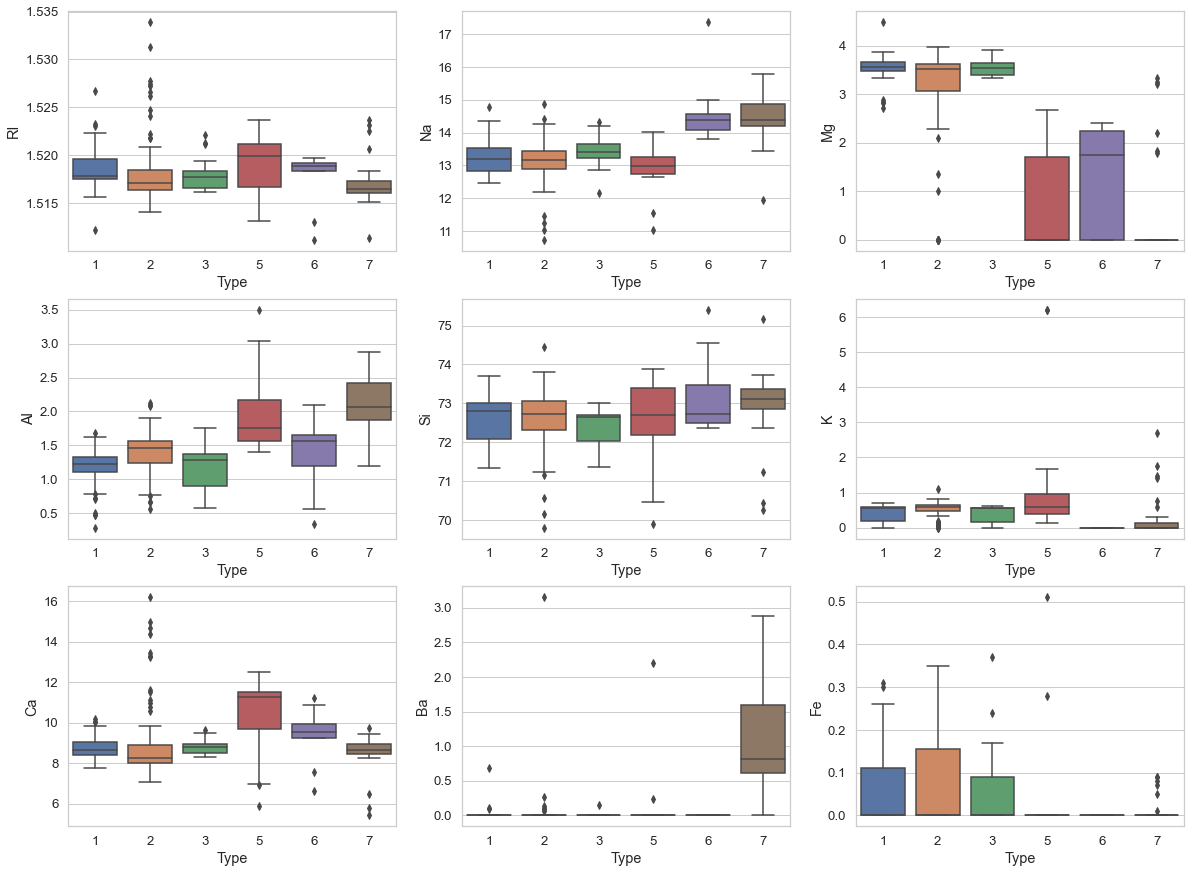

In [45]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass)
plt.show()

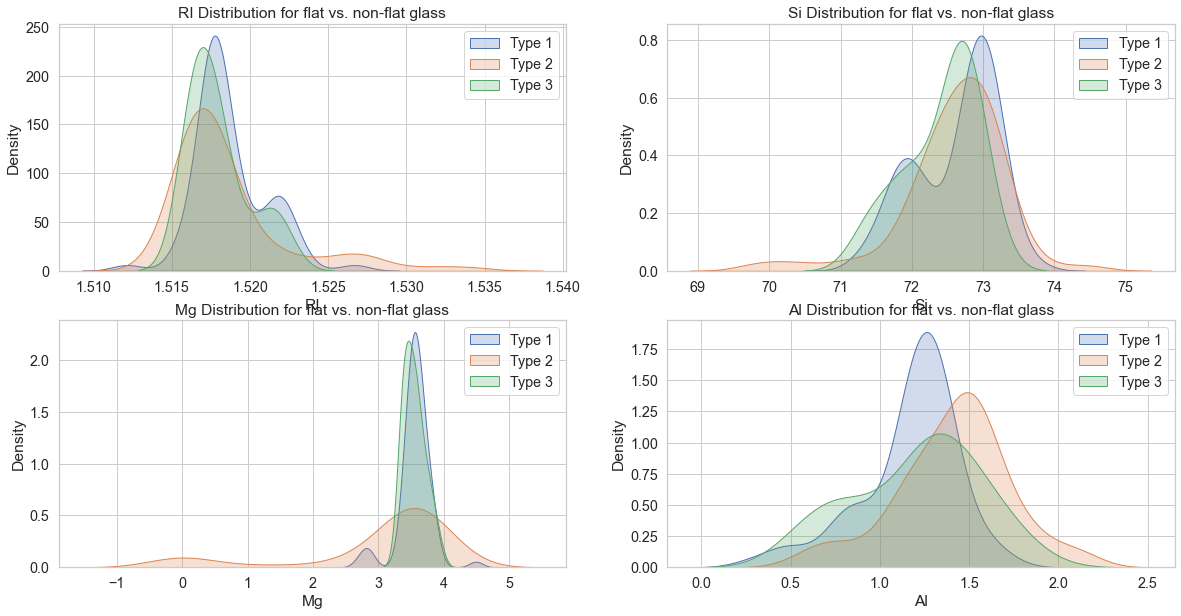

In [46]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass["RI"][glass.Type == 1], shade = True)
sns.kdeplot(glass["RI"][glass.Type == 2], shade = True)
sns.kdeplot(glass["RI"][glass.Type == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,2)
sns.kdeplot(glass["Si"][glass.Type == 1], shade = True)
sns.kdeplot(glass["Si"][glass.Type == 2], shade = True)
sns.kdeplot(glass["Si"][glass.Type == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,3)
sns.kdeplot(glass["Mg"][glass.Type == 1], shade = True)
sns.kdeplot(glass["Mg"][glass.Type == 2], shade = True)
sns.kdeplot(glass["Mg"][glass.Type == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,4)
sns.kdeplot(glass["Al"][glass.Type == 1], shade = True)
sns.kdeplot(glass["Al"][glass.Type == 2], shade = True)
sns.kdeplot(glass["Al"][glass.Type == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])